# Pandas I - Working with DataFrames
Agenda today:
- Getting started with Pandas
- select data using pandas
- manipulate dataframes using pandas
- aggregating in pandas
- Case Study - Exploratory data analysis
<img src="Screen%20Shot%202019-02-10%20at%209.22.00%20PM.png" alt="Drawing" style="width: 400px;"/><br>


## 1 Pandas Basics 

In [9]:
# importing the necessary pacakges
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [17]:
# creating a dataframe from scratch 
# syntax: pd.DataFrame()
# df 1 will be consist of index of numeric values and columns of numeric and categorical values
grades_dict = {
                     "Project_1_Grade":np.random.randint(low=80,high=89,size=6),
                     "Project_2_Grade":np.random.randint(low=72,high=95,size=6),
                     "Project_3_Grade":np.random.randint(low=80,high=99,size=6),
                     "Project_4_Grade":np.random.randint(low=75,high=95,size=6),
                      }
grades = pd.DataFrame(grades_dict,
                    index = ['Justin','Rima','Derrick','Abdul','Luke','Lois'])
#grades = pd.DataFrame(grades_dict, index = range(6))
grades

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade
Justin                84               75               96               93
Rima                  85               83               97               76
Derrick               80               86               98               78
Abdul                 87               76               94               89
Luke                  84               90               86               90
Lois                  85               81               81               79

In [11]:
# saving data to an excel file: 
grades.to_excel('grades.xlsx')

ModuleNotFoundError: No module named 'openpyxl'

In [18]:
# saving data to csv
grades.to_csv('grades.csv')

Two types of objects in Pandas:
- __Series__: one-dimensional object capable of storing any data structure 
- __DataFrame__: two-dimensional object capable of storing any data structure

Different types of index in Pandas:
- Numbers
- Strings
- Datetime (will be covered tomorrow)
- Multilevel indexing (will be covered tomorrow)

In [104]:
# example of using strings as index
my_df2 = pd.DataFrame({"A":[1,2,4,5],
                     "B":[7,8,9,10],
                     "C":[3,4,6,10],
                     "D":[11,10,9,19],
                     "E":['str1','STR2','stR3','sTR4'],
                     "F":[np.nan,np.nan,'No','13']},
                     index = ['foo1','foo2','foo3','foo4'])

In [105]:
my_df2

A   B   C   D     E    F
foo1  1   7   3  11  str1  NaN
foo2  2   8   4  10  STR2  NaN
foo3  4   9   6   9  stR3   No
foo4  5  10  10  19  sTR4   13

In [40]:
# exploring pandas df methods
# viewing the dataframes
my_df2.head()
grades.tail() # OR grades.tail(2) if you want a specific number 
grades.sample() # random entry 

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade
Lois               85               81               81               79

In [41]:
# examine the datatypes
grades.dtypes.value_counts()

int64    4
dtype: int64

In [44]:
grades.dtypes

Project_1_Grade    int64
Project_2_Grade    int64
Project_3_Grade    int64
Project_4_Grade    int64
dtype: object

In [46]:
grades.shape # returns columns, rows

(6, 4)

In [47]:
grades.dtypes.value_counts()

int64    4
dtype: int64

In [48]:
# examine the unique elements 
grades.Project_2_Grade.unique()

array([75, 83, 86, 76, 90, 81])

In [51]:
grades.Project_2_Grade.nunique() # number of unique elements

6

In [54]:
# get summary statistics 
grades.describe()

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade
count         6.000000         6.000000         6.000000         6.000000
mean         84.166667        81.833333        92.000000        84.166667
std           2.316607         5.776389         6.899275         7.305249
min          80.000000        75.000000        81.000000        76.000000
25%          84.000000        77.250000        88.000000        78.250000
50%          84.500000        82.000000        95.000000        84.000000
75%          85.000000        85.250000        96.750000        89.750000
max          87.000000        90.000000        98.000000        93.000000

In [55]:
# get correlations
grades.corr()
# how do you visualize correlation?

Project_1_Grade  Project_2_Grade  Project_3_Grade  \
Project_1_Grade         1.000000        -0.505669        -0.300321   
Project_2_Grade        -0.505669         1.000000        -0.240886   
Project_3_Grade        -0.300321        -0.240886         1.000000   
Project_4_Grade         0.305297        -0.340459        -0.043650   

                 Project_4_Grade  
Project_1_Grade         0.305297  
Project_2_Grade        -0.340459  
Project_3_Grade        -0.043650  
Project_4_Grade         1.000000

In [60]:
# looking for missing values 
grades.isnull()
grades.isnull().sum().any()  # returns boolean - True if you have any missing values

False

In [66]:
# sorting values according to a column or multiple columns/
grades.sort_values(by = 'Project_2_Grade', ascending=False)

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade
Luke                  84               90               86               90
Derrick               80               86               98               78
Rima                  85               83               97               76
Lois                  85               81               81               79
Abdul                 87               76               94               89
Justin                84               75               96               93

In [68]:
# putting them together to find out which column has the highest number of missing values
grades.isnull().sum().sort_values(ascending = False)

Project_4_Grade    0
Project_3_Grade    0
Project_2_Grade    0
Project_1_Grade    0
dtype: int64

## 2. Subset and Index

In [84]:
# subsetting data - rows
# selecting rows that fit certain criteria -- boolean index
grades[grades.Project_1_Grade == 80.0]  

# subsetting a column using dot notation returns a series



Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade
Derrick               80               86               98               78

In [87]:
grades[grades.Project_2_Grade > 80]

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade
Rima                  85               83               97               76
Derrick               80               86               98               78
Luke                  84               90               86               90
Lois                  85               81               81               79

In [92]:
# filtering by multiple criteria
grades[(grades.Project_1_Grade > 79.0) & (grades.Project_3_Grade > 87)]

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade
Justin                84               75               96               93
Rima                  85               83               97               76
Derrick               80               86               98               78
Abdul                 87               76               94               89

In [93]:
grades[grades.Project_1_Grade > grades.Project_3_Grade]

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade
Lois               85               81               81               79

In [94]:
# selecting rows or index by position -> iloc
grades.iloc[:,2] # every row, third column only  

Justin     96
Rima       97
Derrick    98
Abdul      94
Luke       86
Lois       81
Name: Project_3_Grade, dtype: int64

In [95]:
# selecting rows or index by names -> loc
grades.loc['Luke'] # loc method takes string as index 

Project_1_Grade    84
Project_2_Grade    90
Project_3_Grade    86
Project_4_Grade    90
Name: Luke, dtype: int64

In [99]:
# selecting columns
grades['Project_1_Grade'] # pass name of column in square brackets 
#grades.Project_1_Grade # dot method works the same but doesn't work if the column contains spaces 

Justin     84
Rima       85
Derrick    80
Abdul      87
Luke       84
Lois       85
Name: Project_1_Grade, dtype: int64

In [100]:
# selecting multiple columns 
grades[['Project_1_Grade','Project_2_Grade']] #Subsetting multiple columns returns a data frame

Project_1_Grade  Project_2_Grade
Justin                84               75
Rima                  85               83
Derrick               80               86
Abdul                 87               76
Luke                  84               90
Lois                  85               81

## 2. Manipulate the DataFrames 

In [116]:
my_df2 = pd.DataFrame({"A":[1,2,4,5],
                     "B":[7,8,9,10],
                     "C":[3,4,6,10],
                     "D":[11,10,9,19],
                     "E":['str1','STR2','stR3','sTR4'],
                     "F":[np.nan,np.nan,'No','13']},
                     index = ['foo1','foo2','foo3','foo4'])

In [117]:
# adding and manipulating the dataframes
my_df2['E_lower'] = my_df2.E.apply(lambda x:x.lower())

# .apply( ) works the same as map 

#what did I do here?
my_df2

A   B   C   D     E    F E_lower
foo1  1   7   3  11  str1  NaN    str1
foo2  2   8   4  10  STR2  NaN    str2
foo3  4   9   6   9  stR3   No    str3
foo4  5  10  10  19  sTR4   13    str4

In [118]:
# dropping a colum 
my_df2.drop('E', axis = 1)
# parameter: inplace
my_df2

help(my_df2.drop)

Help on method drop in module pandas.core.frame:

drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index, columns : single label or list-like
        Alternative to specifying axis (``labels, axis=1``
        is equivalent to ``columns=labels``).
    
        .. versionadded:: 0.21.0
    level : int or level name, optional
        For MultiIndex, level

In [120]:
# more apply examples 
# get the average grades of the students
grades['average'] = grades.mean(axis = 1)
grades

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade  \
Justin                84               75               96               93   
Rima                  85               83               97               76   
Derrick               80               86               98               78   
Abdul                 87               76               94               89   
Luke                  84               90               86               90   
Lois                  85               81               81               79   

         average  
Justin     87.00  
Rima       85.25  
Derrick    85.50  
Abdul      86.50  
Luke       87.50  
Lois       81.50

In [121]:
grades['passed?'] = grades.average.apply(lambda x : 'Yes' if x >= 85 else 'No' )
grades

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade  \
Justin                84               75               96               93   
Rima                  85               83               97               76   
Derrick               80               86               98               78   
Abdul                 87               76               94               89   
Luke                  84               90               86               90   
Lois                  85               81               81               79   

         average passed?  
Justin     87.00     Yes  
Rima       85.25     Yes  
Derrick    85.50     Yes  
Abdul      86.50     Yes  
Luke       87.50     Yes  
Lois       81.50      No

In [122]:
# pandas automatically broadcast - which is pretty awesome
grades['awesome?'] = 'Yes'
grades

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade  \
Justin                84               75               96               93   
Rima                  85               83               97               76   
Derrick               80               86               98               78   
Abdul                 87               76               94               89   
Luke                  84               90               86               90   
Lois                  85               81               81               79   

         average passed? awesome?  
Justin     87.00     Yes      Yes  
Rima       85.25     Yes      Yes  
Derrick    85.50     Yes      Yes  
Abdul      86.50     Yes      Yes  
Luke       87.50     Yes      Yes  
Lois       81.50      No      Yes

In [125]:
grades['test_new'] = range(2, 8)
grades

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade  \
Justin                84               75               96               93   
Rima                  85               83               97               76   
Derrick               80               86               98               78   
Abdul                 87               76               94               89   
Luke                  84               90               86               90   
Lois                  85               81               81               79   

         average passed? awesome?  test_new  
Justin     87.00     Yes      Yes         2  
Rima       85.25     Yes      Yes         3  
Derrick    85.50     Yes      Yes         4  
Abdul      86.50     Yes      Yes         5  
Luke       87.50     Yes      Yes         6  
Lois       81.50      No      Yes         7

In [126]:
# introduce some missing values
grades.iloc[3:4,3] = None
 # how does axis parameter affect dropna?
grades.isnull().sum().any()

True

In [127]:
grades

Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade  \
Justin                84               75               96             93.0   
Rima                  85               83               97             76.0   
Derrick               80               86               98             78.0   
Abdul                 87               76               94              NaN   
Luke                  84               90               86             90.0   
Lois                  85               81               81             79.0   

         average passed? awesome?  test_new  
Justin     87.00     Yes      Yes         2  
Rima       85.25     Yes      Yes         3  
Derrick    85.50     Yes      Yes         4  
Abdul      86.50     Yes      Yes         5  
Luke       87.50     Yes      Yes         6  
Lois       81.50      No      Yes         7

In [128]:
grades.dropna(axis = 0) # drop missing value row-wise, drops all of Abdul row
# inplace parameter, axis parameter 
# if inplace=True then you change the dataframe instead of returning a new copy of it 


Project_1_Grade  Project_2_Grade  Project_3_Grade  Project_4_Grade  \
Justin                84               75               96             93.0   
Rima                  85               83               97             76.0   
Derrick               80               86               98             78.0   
Luke                  84               90               86             90.0   
Lois                  85               81               81             79.0   

         average passed? awesome?  test_new  
Justin     87.00     Yes      Yes         2  
Rima       85.25     Yes      Yes         3  
Derrick    85.50     Yes      Yes         4  
Luke       87.50     Yes      Yes         6  
Lois       81.50      No      Yes         7

## 3. Aggregating in Pandas - Groupby

In [129]:
# aggregating in dataframes
# create another dataframe 
new_grades = pd.DataFrame({"student":['Marc','Grace','Rene','Marc','Kenneth','Kevin','Kenneth','Grace'],
                          "project":['project_1','project_1','project_1','project_2','project_1','project_1','project_2','project_2'],
                          "grades":[80,75,89,99,89,95,97,80]})

In [130]:
new_grades

student    project  grades
0     Marc  project_1      80
1    Grace  project_1      75
2     Rene  project_1      89
3     Marc  project_2      99
4  Kenneth  project_1      89
5    Kevin  project_1      95
6  Kenneth  project_2      97
7    Grace  project_2      80

In [131]:
new_grades.shape

(8, 3)

In [143]:
print(new_grades.student.nunique())
print(new_grades.student.unique())
print(new_grades.project.unique())

5
['Marc' 'Grace' 'Rene' 'Kenneth' 'Kevin']
['project_1' 'project_2']


In [144]:
# get the mean values of students' grade
new_grades.groupby('student').grades.mean()

student
Grace      77.5
Kenneth    93.0
Kevin      95.0
Marc       89.5
Rene       89.0
Name: grades, dtype: float64

In [150]:
# get the mean values for each projects
new_grades.groupby('project').mean()

grades
project          
project_1    85.6
project_2    92.0

In [159]:
new_grades.groupby("project").grades.mean()

project
project_1    85.6
project_2    92.0
Name: grades, dtype: float64

In [160]:
new_grades.sort_values(by = "student").reset_index()

index  student    project  grades
0      1    Grace  project_1      75
1      7    Grace  project_2      80
2      4  Kenneth  project_1      89
3      6  Kenneth  project_2      97
4      5    Kevin  project_1      95
5      0     Marc  project_1      80
6      3     Marc  project_2      99
7      2     Rene  project_1      89

In [169]:
grade_averages = pd.DataFrame(new_grades.groupby('student').mean())

grade_averages.rename(columns={'grades':'grade_average'}, inplace=True)
grade_averages

grade_average
student               
Grace             77.5
Kenneth           93.0
Kevin             95.0
Marc              89.5
Rene              89.0

## 4. Case Study - Exploratory Data Analysis
We will use the adults dataset from census to perform exploratory data analysis. For more details on this dataset, check it out [here](http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf)

In [170]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adults = pd.read_csv(url,header=None)

In [171]:
adults.sample(5)

0         1       2              3   4                    5   \
5948   39   Private  327435      Bachelors  13   Married-civ-spouse   
17928  29   Private  186624        HS-grad   9   Married-civ-spouse   
23679  19   Private  140985   Some-college  10        Never-married   
10794  24   Private  216563        HS-grad   9   Married-civ-spouse   
20756  50   Private  234373        Masters  14   Married-civ-spouse   

                       6                7       8        9   10    11  12  \
5948       Prof-specialty             Wife   White   Female   0     0  36   
17928       Other-service             Wife   White   Female   0     0  40   
23679        Adm-clerical   Other-relative   White     Male   0     0  25   
10794   Machine-op-inspct             Wife   White   Female   0     0  40   
20756     Exec-managerial             Wife   White   Female   0  1485  40   

                   13      14  
5948    United-States    >50K  
17928            Cuba   <=50K  
23679   United-States   <=50K  
10794   United-States   <=50K  
20756   United-States   <=50K

In [172]:
adults.head(5)

0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-States   <=50K  
4            Cuba   <=50K

In [173]:
columns = ['age','work_class','fnlwgt','education','education_num','marital_status','occupation','relationship','race'
           ,'sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [174]:
adults.columns = columns

In [175]:
# examine the datatypes
adults.dtypes

age                int64
work_class        object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [176]:
# get datatypes counts
adults.dtypes.value_counts()

object    9
int64     6
dtype: int64

In [62]:
adults.head(5)

age        work_class  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [188]:
# filtering certain conditions
bach_female = adults[(adults.education == 'Bachelors') & (adults.sex == 'Female')]
# how come thats empty?
bach_female

age        work_class  fnlwgt  education  education_num  \
4       28           Private  338409  Bachelors             13   
12      23           Private  122272  Bachelors             13   
71      31           Private  309974  Bachelors             13   
125     47           Private  287828  Bachelors             13   
152     33           Private  163003  Bachelors             13   
186     41  Self-emp-not-inc  143129  Bachelors             13   
187     53                 ?  135105  Bachelors             13   
251     42           Private  390781  Bachelors             13   
260     36           Private  150042  Bachelors             13   
268     33           Private  185480  Bachelors             13   
280     22           Private   34918  Bachelors             13   
283     60           Private  173960  Bachelors             13   
288     25           Private  371987  Bachelors             13   
294     27           Private  248402  Bachelors             13   
296     37      Self-emp-inc   57424  Bachelors             13   
313     36  Self-emp-not-inc  205607  Bachelors             13   
368     57           Private  212448  Bachelors             13   
422     32         State-gov   92003  Bachelors             13   
432     40  Self-emp-not-inc  204116  Bachelors             13   
464     24           Private  170070  Bachelors             13   
469     30           Private  118551  Bachelors             13   
475     46           Private  279196  Bachelors             13   
488     45         Local-gov  164427  Bachelors             13   
504     25           Private  181054  Bachelors             13   
538     31      Self-emp-inc   41493  Bachelors             13   
578     58         Local-gov  283635  Bachelors             13   
594     23           Private  117789  Bachelors             13   
599     49           Private  136455  Bachelors             13   
614     27           Private  109881  Bachelors             13   
620     23           Private  190483  Bachelors             13   
...    ...               ...     ...        ...            ...   
32014   26           Private  192022  Bachelors             13   
32032   40         State-gov   31627  Bachelors             13   
32051   22           Private  205940  Bachelors             13   
32064   49           Private   93639  Bachelors             13   
32066   29      Self-emp-inc  124950  Bachelors             13   
32081   49         Local-gov  106554  Bachelors             13   
32091   34           Private  272411  Bachelors             13   
32095   27           Private  126060  Bachelors             13   
32101   45           Private  174794  Bachelors             13   
32126   23         State-gov  136075  Bachelors             13   
32159   46           Private  155933  Bachelors             13   
32166   42         Local-gov  189956  Bachelors             13   
32188   29           Private  153416  Bachelors             13   
32204   23         Local-gov  162551  Bachelors             13   
32213   28           Private  175710  Bachelors             13   
32247   44       Federal-gov   38434  Bachelors             13   
32252   37  Self-emp-not-inc  103925  Bachelors             13   
32286   28           Private  478315  Bachelors             13   
32344   34           Private  121966  Bachelors             13   
32347   36         State-gov  212143  Bachelors             13   
32373   22           Private  205940  Bachelors             13   
32418   26           Private   48280  Bachelors             13   
32420   23           Private   45834  Bachelors             13   
32428   39       Federal-gov  110622  Bachelors             13   
32461   24           Private  284317  Bachelors             13   
32511   25         Local-gov  514716  Bachelors             13   
32530   35                 ?  320084  Bachelors             13   
32531   30                 ?   33811  Bachelors             13   
32536   34           Private  160216  Bachelors

In [189]:
bach_female.shape

(1619, 15)

In [183]:
# examine some cells
adults.iloc[0,3]
# turned out that the cell contains white space -- that's why we couldn't get the condition. We need to 

' Bachelors'

In [184]:
# strip whitespace -- using lambda function to remove whitespace for string objects
adults = adults.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [186]:
# sorting values
adults.sort_values(['fnlwgt'],ascending = False)

age        work_class   fnlwgt     education  education_num  \
14449   25           Private  1484705  Some-college             10   
18138   39           Private  1455435    Assoc-acdm             12   
16739   45           Private  1366120     Assoc-voc             11   
15569   29           Private  1268339       HS-grad              9   
8258    35           Private  1226583     Bachelors             13   
5369    30           Private  1184622  Some-college             10   
25075   33           Private  1161363  Some-college             10   
29164   42         Local-gov  1125613       HS-grad              9   
27365   42      Self-emp-inc  1097453     Bachelors             13   
27682   24           Private  1085515       HS-grad              9   
9748    23           Private  1038553       HS-grad              9   
23523   31           Private  1033222     Bachelors             13   
414     31         State-gov  1033222  Some-college             10   
31792   32                 ?   981628       HS-grad              9   
7934    43           Private   972354  Some-college             10   
20488   35           Private   953588       HS-grad              9   
15044   36       Federal-gov   930948  Some-college             10   
8485    26           Private   917220          12th              8   
5423    33         State-gov   913447  Some-college             10   
1597    37           Private   910398     Bachelors             13   
18874   44           Private   889965       HS-grad              9   
312     19                 ?   860348  Some-college             10   
30760   33           Private   857532          12th              8   
14414   32           Private   857532       HS-grad              9   
12263   34           Private   849857       HS-grad              9   
24090   54           Private   816750       HS-grad              9   
25851   38           Private   809585     Bachelors             13   
17743   41           Private   806552  Some-college             10   
23373   17                 ?   806316          11th              7   
30116   40           Private   799281       HS-grad              9   
...    ...               ...      ...           ...            ...   
4348    40           Private    20109  Some-college             10   
19515   80         Local-gov    20101       HS-grad              9   
19401   30  Self-emp-not-inc    20098     Assoc-voc             11   
28938   18           Private    20057       7th-8th              4   
25565   34         State-gov    20057  Some-college             10   
14924   43       Federal-gov    19914  Some-college             10   
19027   41       Federal-gov    19914     Bachelors             13   
1715    39           Private    19914  Some-college             10   
21959   44           Private    19914       HS-grad              9   
28613   37           Private    19899       HS-grad              9   
3332    34           Private    19847       HS-grad              9   
3615    30           Private    19847  Some-college             10   
14348   29                 ?    19793  Some-college             10   
18593   17           Private    19752          11th              7   
7835    42         Local-gov    19700     Bachelors             13   
25958   57         State-gov    19520     Doctorate             16   
24249   31           Private    19491  Some-college             10   
10012   24           Private    19410       HS-grad              9   
4142    28         State-gov    19395  Some-college             10   
3173    27           Private    19395  Some-college             10   
16765   31           Private    19302     Bachelors             13   
1784    31           Private    19302    Assoc-acdm             12   
27633   32         Local-gov    19302    Assoc-acdm             12   
23423   30           Private    19302  Some-college             10   
2151    30           Private    19302  Some-college             10   
10826   25       

In [66]:
# get missing values
adults.isnull().sum().any()

False

In [190]:
adults.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [191]:
adults.marital_status.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

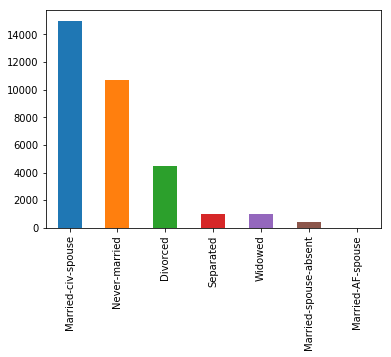

In [193]:
# visualize the results
adults.marital_status.value_counts().plot(kind = 'bar')

# you can call .plot on a panda series or dataframe - calls plt.plt( series/dataframe   ) 

In [197]:
# adults.age.sort_values(ascending = True)
adults.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [198]:
adults.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

Text(0.5, 1.0, 'Histogram for Age Distribution')

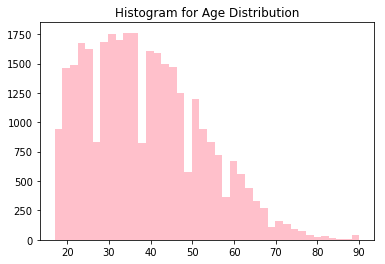

In [202]:
plt.hist(adults['age'],bins = 40, color = 'pink')
plt.title('Histogram for Age Distribution')

In [204]:
# create a new column for the target variable. If income more than >50K, 1 else 0 
adults['income_binary'] = adults.income.apply(lambda x: 1 if x == '>50K' else 0) 

adults.income_binary.value_counts()

0    24720
1     7841
Name: income_binary, dtype: int64

Text(0.5, 1.0, 'Income')

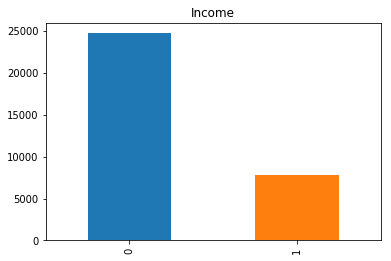

In [205]:
adults.income_binary.value_counts().plot(kind = 'bar')
plt.title('Income')

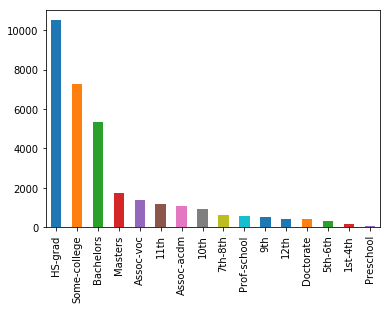

In [207]:
adults.education.value_counts().plot(kind = 'bar')

In [208]:
# examine correlations
adults.corr()
# .corr() only works on numerical values, skips strings 

age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education_num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital_gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital_loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours_per_week  0.068756 -0.018768       0.148123      0.078409      0.054256   
income_binary   0.234037 -0.009463       0.335154      0.223329      0.150526   

                hours_per_week  income_binary  
age                   0.068756       0.234037  
fnlwgt               -0.018768      -0.009463  
education_num         0.148123       0.335154  
capital_gain          0.078409       0.223329  
capital_loss          0.054256       0.150526  
hours_per_week        1.000000       0.229689  
income_binary         0.229689       1.000000

In [209]:
# summary statistics
adults.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  income_binary  
count    32561.000000   32561.000000  
mean        40.437456       0.240810  
std         12.347429       0.427581  
min          1.000000       0.000000  
25%         40.000000       0.000000  
50%         40.000000       0.000000  
75%         45.000000       0.000000  
max         99.000000       1.000000

In [211]:
grouped_by_marital = adults.groupby('marital_status').income_binary.value_counts().unstack('income_binary')
# creates a multilevel index - the groupby becomes a new index


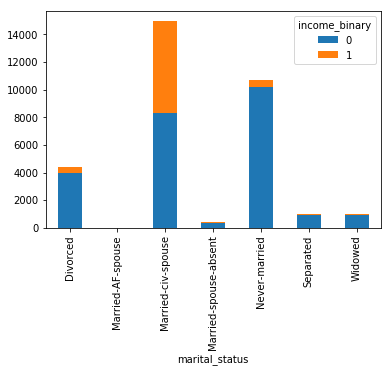

In [213]:
# plot a stacked barplot 
grouped_by_marital.columns
grouped_by_marital[[0,1]].plot(kind = 'bar',stacked = True)

In [214]:
# trying more groupby stuff 
grouped_by_gender = adults.groupby('sex').income_binary.value_counts().unstack()

In [218]:
grouped_by_gender

income_binary      0     1
sex                       
Female          9592  1179
Male           15128  6662

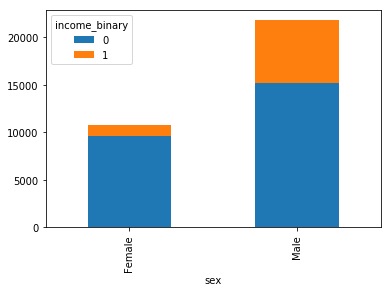

In [219]:
grouped_by_gender.plot(kind = 'bar',stacked = True)

__Conclusion__:<br>
With the help of Pandas, we can manipulate, subset, and extract insights from paneled data with ease. Questions such as "what is the average age of women who get paid more than 50K?", "What is the most common occupation for achieving income higher than 50k?". Pandas allows us to perform exploratory data analysis and detect pattern in our data. Tomorrow, we will cover a deep dive into advanced pandas tabular data manipulation and working with multiple tables. 

Additional Resources:
- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min)
- [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)
- [Data Analysis with Pandas by Kevin Markham](https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y)